In [1]:
import pandas as pd
import quandl
import math
df=quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [2]:
# choose some special features
df=df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [3]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100


In [4]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [5]:
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)

In [13]:
forecast_out=int(math.ceil(0.01*len(df))) 
df['label']=df[forecast_col].shift(-forecast_out) 
df.dropna(inplace=True)
print(df.tail())


            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2017-12-08     1049.38  0.670872   -0.231030    1479665.0  1177.37
2017-12-11     1051.97  0.383091    0.081818    1096997.0  1182.22
2017-12-12     1048.77  1.309153   -0.117143    1684977.0  1181.59
2017-12-13     1051.39  0.389009   -0.065584    1369580.0  1119.20
2017-12-14     1057.47  0.908773    0.187591    1531504.0  1068.76


In [16]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X=np.array(df.drop(['label'],1))
y=np.array(df['label'])

In [17]:
X=preprocessing.scale(X) #normalize]
df.dropna(inplace=True)
print(len(X),len(y))

3355 3355


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9808402316590386


In [22]:
clf1=svm.SVR()
clf1.fit(X_train,y_train)
accuracy=clf1.score(X_test,y_test)
print(accuracy)

0.8045259340585408


In [51]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

In [59]:
df=quandl.get('WIKI/GOOGL')
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col='Adj. Close'


forecast_out=int(math.ceil(0.01*len(df))) 
df['label']=df[forecast_col].shift(-forecast_out) 

X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X) 
X=X[:-forecast_out]
X_lately=X[-forecast_out:] #the value we gonna predict
#normalize
df.dropna(inplace=True)
y=np.array(df['label'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearRegression()
clf.fit(X_train,y_train)

    
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9757974573290087


In [56]:
forecast_set=clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[1076.94532417 1091.76813007 1105.75035342 1100.11618045 1093.53307445
 1090.96087013 1089.47303976 1086.40771508 1080.11367859 1075.73891273
 1073.55210612 1093.48513777 1111.81143114 1115.91162853 1131.01712978
 1134.94419324 1133.42918344 1131.12210815 1132.84333778 1151.63164416
 1150.07572555 1160.52948228 1156.95138661 1164.92742751 1185.44266987
 1197.57900195 1191.40518094 1203.7349338  1209.30724687 1207.21884918
 1198.00769907 1203.6248699  1202.37256309 1137.69175263 1083.7296894 ] 0.9754274343039016 35


In [57]:
# make date value
import datetime
df['Forecast']=np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400 #seconds
next_unix=last_unix+one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

<function matplotlib.pyplot.show(*args, **kw)>

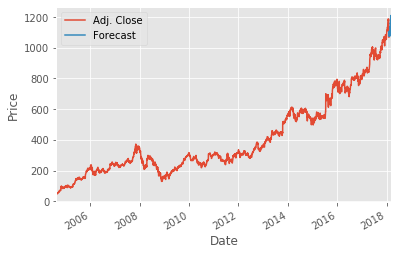

In [58]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show